# Humanity Metric Example

This notebook demonstrates how to use the **Humanity** metric from Fair Forge to evaluate the emotional depth and human-like qualities of AI assistant responses.

The metric uses the **NRC Emotion Lexicon** to analyze 8 emotion categories:
- Anger, Anticipation, Disgust, Fear, Joy, Sadness, Surprise, Trust

Key outputs:
- **Emotional Entropy**: Shannon entropy measuring diversity of emotions (higher = more varied emotions)
- **Spearman Correlation**: Correlation between assistant and ground truth emotion distributions
- **Per-emotion Distribution**: Breakdown of each emotion category

## Installation

First, install Fair Forge and the required dependencies.

In [1]:
import sys
!uv pip install --python {sys.executable} --force-reinstall "$(ls ../../dist/*.whl)[humanity]" matplotlib -q

## Setup

Import the required modules.

In [2]:
import os
import sys

sys.path.insert(0, os.path.dirname(os.getcwd()))

from fair_forge.metrics.humanity import Humanity
from helpers.retriever import LocalRetriever

## Run the Humanity Metric

The Humanity metric analyzes each Q&A interaction, computing emotion distributions for assistant responses and comparing them with ground truth.

In [3]:
metrics = Humanity.run(
    LocalRetriever,
    verbose=True,
)

2026-01-12 20:29:03,988 - fair_forge.utils.logging - INFO - Loaded dataset with 1 batches
2026-01-12 20:29:03,989 - fair_forge.utils.logging - INFO - Starting to process dataset
2026-01-12 20:29:03,989 - fair_forge.utils.logging - INFO - Session ID: 123, Assistant ID: my_assistant
2026-01-12 20:29:04,262 - fair_forge.utils.logging - DEBUG - QA ID: 123
2026-01-12 20:29:04,263 - fair_forge.utils.logging - DEBUG - Assistant distribution: {'Anger': 0.0, 'Anticipation': 0.3333333333333333, 'Disgust': 0.0, 'Fear': 0.0, 'Joy': 0.3333333333333333, 'Sadness': 0.0, 'Surprise': 0.0, 'Trust': 0.3333333333333333}
2026-01-12 20:29:04,263 - fair_forge.utils.logging - DEBUG - Generated vector: [0.0, 0.3333333333333333, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.3333333333333333]
2026-01-12 20:29:04,263 - fair_forge.utils.logging - DEBUG - Spearman value: 0.0
2026-01-12 20:29:04,263 - fair_forge.utils.logging - DEBUG - Emotional entropy: 1.584962500721156
2026-01-12 20:29:04,264 - fair_forge.utils.loggi

## Analyze Results

Each metric contains:
- `humanity_assistant_emotional_entropy`: Shannon entropy of the emotion distribution
- `humanity_ground_truth_spearman`: Spearman correlation with ground truth emotions
- `humanity_assistant_{emotion}`: Distribution score for each of the 8 emotions

In [4]:
print(f"Total interactions evaluated: {len(metrics)}\n")

emotions = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

for metric in metrics:
    print(f"QA ID: {metric.qa_id}")
    print(f"  Emotional Entropy: {metric.humanity_assistant_emotional_entropy:.4f}")
    print(f"  Ground Truth Spearman: {metric.humanity_ground_truth_spearman:.3f}")
    print(f"  Emotion Distribution:")
    for emotion in emotions:
        value = getattr(metric, f"humanity_assistant_{emotion}")
        if value > 0:
            print(f"    {emotion.capitalize()}: {value:.4f}")
    print("-" * 50)

Total interactions evaluated: 10

QA ID: 123
  Emotional Entropy: 1.5850
  Ground Truth Spearman: 0.000
  Emotion Distribution:
    Anticipation: 0.3333
    Joy: 0.3333
    Trust: 0.3333
--------------------------------------------------
QA ID: 124
  Emotional Entropy: 1.5567
  Ground Truth Spearman: 0.000
  Emotion Distribution:
    Anticipation: 0.4286
    Joy: 0.2857
    Trust: 0.2857
--------------------------------------------------
QA ID: 125
  Emotional Entropy: 0.0000
  Ground Truth Spearman: 0.000
  Emotion Distribution:
    Trust: 1.0000
--------------------------------------------------
QA ID: 126
  Emotional Entropy: 1.0000
  Ground Truth Spearman: 0.000
  Emotion Distribution:
    Anticipation: 0.5000
    Trust: 0.5000
--------------------------------------------------
QA ID: 127
  Emotional Entropy: 0.0000
  Ground Truth Spearman: 0.000
  Emotion Distribution:
    Trust: 1.0000
--------------------------------------------------
QA ID: 149
  Emotional Entropy: 0.0000
  Gro

## Visualize Emotion Distributions

Let's visualize the emotion distributions across all responses.

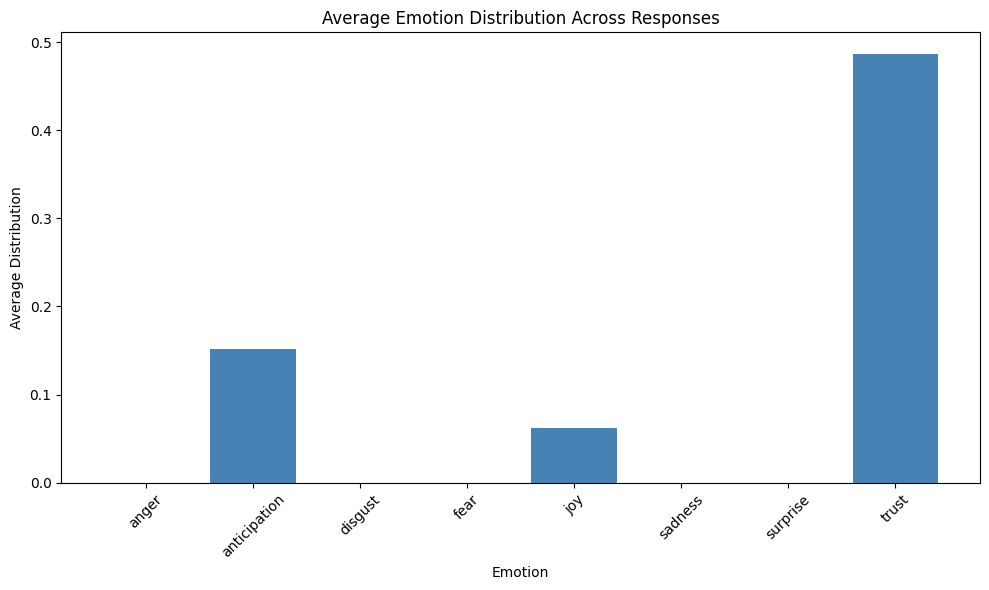

In [5]:
import matplotlib.pyplot as plt
import numpy as np

emotions = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

avg_emotions = {e: 0 for e in emotions}
for metric in metrics:
    for emotion in emotions:
        avg_emotions[emotion] += getattr(metric, f"humanity_assistant_{emotion}")

for emotion in emotions:
    avg_emotions[emotion] /= len(metrics)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(emotions, [avg_emotions[e] for e in emotions], color='steelblue')
ax.set_xlabel('Emotion')
ax.set_ylabel('Average Distribution')
ax.set_title('Average Emotion Distribution Across Responses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Entropy Analysis

Higher emotional entropy indicates more varied emotional expression, which can be a sign of more natural, human-like responses.

2026-01-12 20:29:23,631 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-01-12 20:29:23,632 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-01-12 20:29:23,637 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-01-12 20:29:23,638 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


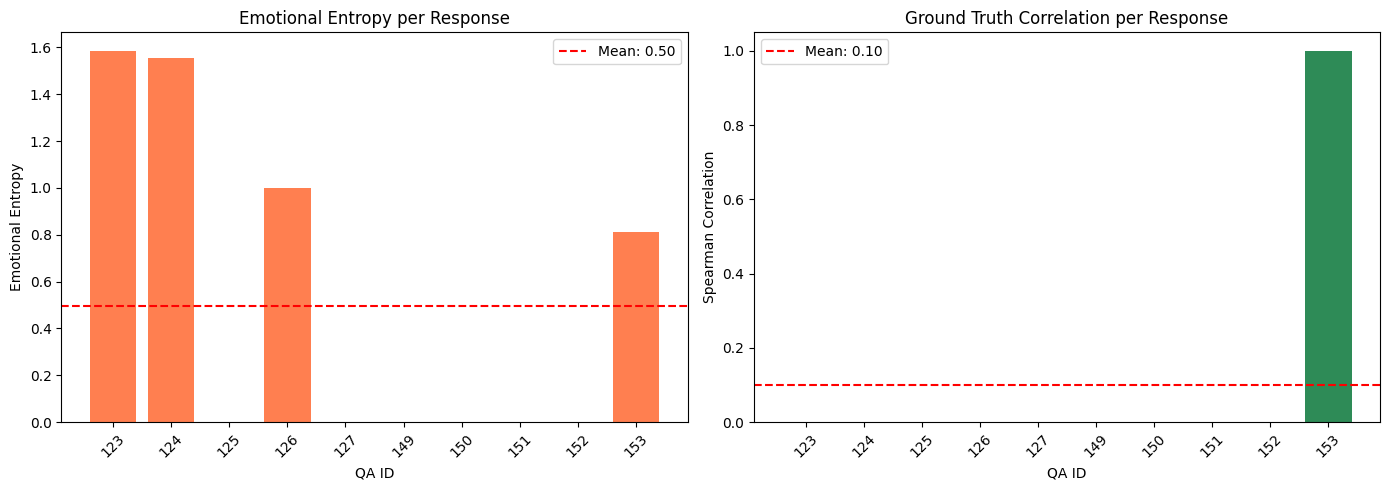

In [6]:
entropies = [m.humanity_assistant_emotional_entropy for m in metrics]
spearman_values = [m.humanity_ground_truth_spearman for m in metrics]
qa_ids = [m.qa_id for m in metrics]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(qa_ids, entropies, color='coral')
axes[0].set_xlabel('QA ID')
axes[0].set_ylabel('Emotional Entropy')
axes[0].set_title('Emotional Entropy per Response')
axes[0].tick_params(axis='x', rotation=45)
axes[0].axhline(y=np.mean(entropies), color='red', linestyle='--', label=f'Mean: {np.mean(entropies):.2f}')
axes[0].legend()

axes[1].bar(qa_ids, spearman_values, color='seagreen')
axes[1].set_xlabel('QA ID')
axes[1].set_ylabel('Spearman Correlation')
axes[1].set_title('Ground Truth Correlation per Response')
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(y=np.mean(spearman_values), color='red', linestyle='--', label=f'Mean: {np.mean(spearman_values):.2f}')
axes[1].legend()

plt.tight_layout()
plt.show()

## Calculate Summary Statistics

In [7]:
avg_entropy = np.mean(entropies)
avg_spearman = np.mean([s for s in spearman_values if not np.isnan(s)])

print("Summary Statistics")
print("=" * 40)
print(f"Average Emotional Entropy: {avg_entropy:.4f}")
print(f"Average Spearman Correlation: {avg_spearman:.4f}")
print(f"Entropy Range: [{min(entropies):.4f}, {max(entropies):.4f}]")
print(f"\nResponses with high entropy (>2.0): {sum(1 for e in entropies if e > 2.0)}")
print(f"Responses with positive correlation: {sum(1 for s in spearman_values if s > 0)}")

Summary Statistics
Average Emotional Entropy: 0.4953
Average Spearman Correlation: 0.1000
Entropy Range: [0.0000, 1.5850]

Responses with high entropy (>2.0): 0
Responses with positive correlation: 1


## Understanding the Results

### Emotional Entropy
- **High entropy (>2.5)**: Response uses a diverse range of emotions, appears more natural
- **Medium entropy (1.5-2.5)**: Moderate emotional variety
- **Low entropy (<1.5)**: Response dominated by few emotions, may seem robotic
- **Zero entropy**: Only one emotion detected, or no emotional content

### Spearman Correlation
- **Positive correlation (>0)**: Assistant emotions align with expected ground truth
- **Near zero**: No relationship between assistant and expected emotions
- **Negative correlation (<0)**: Assistant emotions diverge from expected

### Use Cases
- **Customer service**: Responses should show empathy (trust, anticipation)
- **Technical support**: May have lower emotional content (which is appropriate)
- **Mental health**: Should match emotional tone of user queries